<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/Libro_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cargar ibrerias**

In [2]:
import sympy as sp
import numpy as np
import warnings
import ipywidgets as widgets
import matplotlib.pyplot as plt
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [2]:
!pip install chart_studio

     |████████████████████████████████| 71kB 1.2MB/s 


# **Señales continuas y discretas**

Una señal $x(t)$ es una señal continua si $t$ es una variable continua. Si por otra parte, $t$ es una variable discreta, esto significa que $x(t)$ está definida en tiempos concretos y por lo tanto $x(t)$ es una señal discreta. Dado que una señal discreta esta definida en tiempos discretos, dicha señal puede ser identificada como una secuencia de n\'umeros, denotada por ${x_{n}}$ o por $x[n]$, donde $n=i;i \in \mathbb{Z^{+}}$.

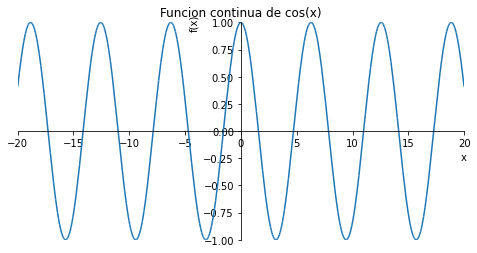

In [ ]:
# Definir simbolo
x=sp.Symbol('x')
# definir funcion
f=sp.cos(x)
# definir limites
infe=-1
supe=1
a=-20
b=20
plt.rcParams['figure.figsize'] = 8, 4
sp.plot(f,(x,a,b),ylim=(infe,supe),title='Funcion continua de '+str(f))

Una señal discreta $x[n]$ puede representar un fenomeno para el cual la variable independiente es inherentemente discreta. Por ejemplo, el promedio de ganancia de un almacen de ropa es por naturaleza una señal que comprende valores discretos en el tiempo (esto es, debido a que los valores se tomas una vez cada dia).

Text(0.5, 1.0, 'Funcion discreta de cos(x)')

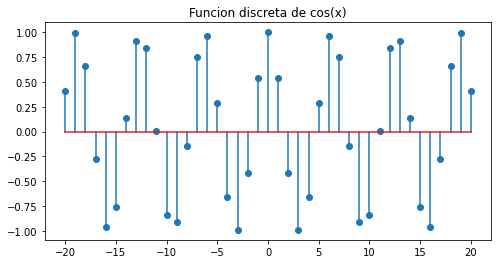

In [ ]:
x=np.linspace(a,b,b-a+1)
y=np.cos(x)
plt.stem(x,y)
plt.title('Funcion discreta de '+str(f))

**Discretizacion**
Se conoce como el proceso mediante el cual se obtiene una señal discreta a travez del muestreo de una señal continua, es decir, sea $x(t)$ una señal continua, esta se puede expresar como
$$x(t)=x(t_{0}),x(t_{1}),...,x(t_{n}),... $$ 
Los $x(t_{n})$ son conocidos como las muestras y estas se toman en un o varios intervalos de tiempo, lo que nos permite re expresar la anterior ecuacion mediatne
$$x[n]=x(t_{n})$$
Si el intervalo entre las muestras es igual se habla de un muestreo uniforme y por lo tanto $x(t)$ se puede expresar mediante
$$x[n]=x(nT_{s})$$
donde $n$ hace referencia a la muestra y $T$ a la constante de intervalo entre las muestras.

**Ejercicio**

In [142]:
#Diszcretizacion de una señal senoidal 
# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(1, 80, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="muestra = " + str(step),
            x=np.linspace(-10, 10, int(step)),
            y=np.sin( np.linspace(-10, 10, int(step))),
            mode= 'markers',
            error_y= {
                    'type': 'data',
                    'symmetric': False,
                    'arrayminus': np.sin( np.linspace(-10, 10, int(step))),
                    'array': [0] * len(np.sin( np.linspace(-10, 10, int(step)))),
                    'width': 0
                },
                marker= {
                    'size': 8
                }))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Discretizacion con : " + str(i+1)+ " muestras"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "T: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

# **Transformacion de la variable independiente**
Las señales pueden ser modeladas mediante una funcion matematica, en caso de ser posible lo anterior, es necesario identificar los componentes de la funcion, en especial la variable independiente, la cual se define como la variable sobre la cual yace el estudio de variacion. Es decir, tomese como ejemplo la funcion lineal de la forma $f(x)=mx+b$, para ese caso la variable independiente es $x$  dado que es sobre la  cual varia la funcion. Actualmente se reconocen tres transformaciones sobre la variable independiente, estas operaciones son: desplazamiento, escalamiento e inversion.

**Desplazamiento**
Es una transformacion que como su nombre indica desplaza una funcion en terminos de una constante que inside sobre la variable independiente. Sea la funcion $x(t)$ y su equivalente desplazada $\Phi(t)=x(t-T)$, n\'otese que la funcion $\Phi(t)$ es la similar a la funcion $x(t)$ a diferencia de la incidencia de la constante  $T$ la cual es una constante que mueve la funcion $x(t)$ dependiendo del dominio que dicha constante tenga. Inicialmente se analizara el caso $T<0$ en cual se evidencia un desplazamiento un a a izquierda como se puede observar en la figura 2. Por otra parte en el caso $T>0$ se evidencia un desplazamiento a la derecha de la funcion en cuestion, como se observa en la figura.

In [217]:
# Escalon Unitario
xo=0 # Desplzamiento del escalon unitario

# Create figure
fig = go.Figure()
t=np.linspace(-10, 10, 2100)
# Add traces, one for each slider step
for step in np.arange(-10, 10, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="desplzamiento en x= " + str(step),
            x=t,
            y=[1 if (t[i]>=step and t[i]<=step+2) else 0 for i in range(len(t)) ],
            ))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Funcion f(x-( " + str(i-10)+ " ))"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "T: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

**Escalamiento**
El escalamiento es la transformacion de la variable independiente relacionada con la expansion o compresion de una señal.Sea $x(t)$ una señal en el tiempo y $\Phi(t)=x(\alpha t)$ la misma señal $x(t)$ escalada un factor de $\alpha$, Si  $\alpha>1$ la señal $\Phi(t)$ es una version comprimida de $x(t)$. En otro caso, si $0<\alpha<1$, la señal $\Phi(t)$ es una version expandida de $x(t)$.

In [11]:
# Escalon Unitario
xo=0 # Desplzamiento del escalon unitario

# Create figure
fig = go.Figure()
t=np.linspace(-10, 10, 2100)
# Add traces, one for each slider step
for step in np.arange(0, 2, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="desplzamiento en x= " + str(step),
            x=t,
            y=[1 if (t[i]>=(-1)/step and t[i]<=(-1+2)/step) else 0 for i in range(len(t)) ],
            ))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Funcion f(x( " + str(i/10)+ " ))"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "T: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

**Inversion**
La operacion de inversion corresponde a una rotacion de la señal en 180° sobre el eje de la variable dependiente, es decir, el eje vertical. Sea una $x(t)$ una señal y $\Phi(t)=x(-t)$ su version rotada. Notese el cambio en el cambio en el signo de la variable $t$.

In [23]:
# Escalon Unitario
xo=0 # Desplzamiento del escalon unitario

# Create figure
fig = go.Figure()
t=np.linspace(-10, 10, 2100)
# Add traces, one for each slider step
for step in [-1,1]:
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="desplzamiento en x= " + str(step),
            x=t,
            y=np.exp(step*t),
            ))

# Make 10th trace visible
fig.data[1].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Funcion f(x( " + str(i)+ " ))"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "T: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

# **Señales pares e impares**
**Señales pares:** son las señales que se reflejan sobre el eje horizontal, es decir:
$$f(x)=f(-x)$$

In [38]:
N = 100
x0 = np.linspace(0, 10, N)

y0 = np.cos(x0)
y1 = np.cos(-1*x0)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x0, y=y0,
                    mode='lines',
                    name='cos(x)'))
fig.add_trace(go.Scatter(x=x0, y=y1,
                    mode='markers',
                    name='cos(-x)'))


fig.show()

**Señales impares:**  son las señales que no se reflejan sobre el eje horizontal, es decir:
$$f(x)\neq f(-x)$$

In [40]:
N = 100
x0 = np.linspace(0, 10, N)

y0 = np.sin(x0)
y1 = np.sin(-1*x0)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=x0, y=y0,
                    mode='lines',
                    name='sin(x)'))
fig.add_trace(go.Scatter(x=x0, y=y1,
                    mode='markers',
                    name='sin(-x)'))


fig.show()

# **Algunas señales especiales**
Dentro del campo de las señales se encuentran algunas las cuales emulan el comportamiento de los operadores matematicos, incluso dichas señales se pueden asociarse al comportamiento de un sistema (por ahora el termino sistema puede ser relacionado con un circuito del cual unicamente se conoce su entrada y su salida) con el que se interactua en la vida laboral, algunas de estas señales son: 



**Señal escalon unitario:**
 
Conocida como señal escalon unitario o  escalón de Heaviside es una funcion discontinua cuyo valor es cero para los valores anteriores al argumento de la funcion y uno para los valores iguales o posteriores al argumento, es decir:
$$u(x)=\left\{\begin{matrix}
 0& si & x<0 & \\ 
 1& si & x\geq 1 & 
\end{matrix}\right.$$
Esta funcion es una analogia ideal al encendido de un switch en un instante considerado del tiempo, a continuacion se hace una representacion de la señal, esta se hace en modo discreto debido a inconvenientes tecnicos para graficarla en forma continua 

In [210]:
# Escalon Unitario
xo=0 # Desplzamiento del escalon unitario

# Create figure
fig = go.Figure()
t=np.linspace(-10, 10, 800)
# Add traces, one for each slider step
for step in np.arange(-10, 10, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="desplzamiento en x= " + str(step),
            x=t,
            y=[1 if (t[i]>=step) else 0 for i in range(len(t)) ]))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Escalon u(x-( " + str(i-10)+ " ))"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "T: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

Aplicacion de esta señal, la señal se suele combinar o convolucionar (operacion entre señales) con otra para analizar el comportamiento de la otra señal en el instante de tiempo que comprende el escalon, por ejemploen el capitulo de las señales de energia y potencia se aprecian dos casos de señales combinadas con funciones escalon. Alli mismo se evidencia que la funcion  que interactua con el escalon se "reccorta" de acuerdo al instante en que el escalon inicia

**Señal escalon**
Es una variacion de la señal escalon unitario, pues esta comprende un intervalo en donde los valores de la funcion son iguales a uno y en otro caso es igual a cero, es decir:
$$u(x)=\left\{\begin{matrix}
 0& si & b<x<a & \\ 
 1& si & a\leq x\leq b & 
\end{matrix}\right.$$
Una analogia que se presenta en esta señal se aprecia en un circuito en donde se prende un switch en un instante to y luego de un intervalo de tiempo se apaga nuevamente.

In [211]:
# Escalon Unitario
xo=0 # Desplzamiento del escalon unitario

# Create figure
fig = go.Figure()
t=np.linspace(-10, 10, 800)
# Add traces, one for each slider step
for step in np.arange(-10, 10, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="desplzamiento en x= " + str(step),
            x=t,
            y=[1 if (t[i]>=step and t[i]<=step+2) else 0 for i in range(len(t)) ]))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Escalon u(x-( " + str(i-10)+ " ))"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "T: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

**funcion delta de dirac**
Es una funcion de distribucion o funcion generalizada, la cual tiene la caracteristica de que en el instante $x$ su valor tiende a infinito y en otro caso su valor es igual a cero, es decir
$$\delta(x)=\left\{\begin{matrix}
 0& si & x\neq0 & \\ 
 \infty& si & x=0 & 
\end{matrix}\right. $$
Analogamente no se puede emular esta señal en ningun sistema fisico por mas condiciones ideales que se consideren, pero se podria pensar en un switch que se prende y se apaga de manera instantanea en un instante determinado del tiempo

In [216]:
# Escalon Unitario
xo=0 # Desplzamiento del escalon unitario

# Create figure
fig = go.Figure()
t=np.linspace(-10, 10, 21)
# Add traces, one for each slider step
for step in np.arange(-10, 10, 1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="desplzamiento en x= " + str(step),
            x=t,
            y=[1 if (t[i]==step) else 0 for i in range(len(t)) ],
            mode= 'markers',
            error_y= {
                    'type': 'data',
                    'symmetric': False,
                    'arrayminus':[1 if (t[i]==step) else 0 for i in range(len(t)) ],
                    'array': [0] * len([1 if (t[i]==step) else 0 for i in range(len(t)) ]),
                    'width': 0
                },
                marker= {
                    'size': 8
                }))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Delta d(x-( " + str(i-10)+ " ))"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "T: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

Esta señal se utiliza para convolucionarla con otra señal dado que el resultado de la convolucion es igual a un delta del valor de la señal implicada en la posicion del delta establecido. otra manera de verlo puede ser que multples deltas sirven para la discretizacion de una señal (observar ejercicio arriba) 

# **Señales de energia y potencia**

Con el fin de entender la teoria de las señales de energia y potencia es necesario analizar la figura que se muestra a continuacion, en especial el concepto de potencia en presente en el resistor.

![alt text](https://www.electronics-tutorials.ws/wp-content/uploads/2018/05/accircuits-acp77.gif)

Recordemos que la potencia en el resisitor se describe como:
\
$$P(t)=V_{R(t)}*I_{R}$$
\
Dando como resultado estas dos posibles opciones
\
$$P(t)=\frac{V(t)^{2}}{R}$$
\
ó
\
$$P(t)=I(t)^{2}R$$
\
Para este caso se tomara como referencia la ultima ecuacion $P(t)=I(t)^{2}R$, adicionalmente por cuestiones de facilidad se asume una resitencia $R=1\Omega$. Por utlimo se estima la energia total y la potencia promedi, dando como resultado
\
$$E=\int_{- \infty}^{\infty}I(t)^{2}dt$$

$$P=\lim_{T->\infty}\frac{1}{T}\int_{- \frac{T}{2}}^{\frac{T}{2}}I(t)^{2}dt$$
\
Extendiendo el concepto a una señal $x(t)$, las funciones de energia y potencia se establecen como
\
$$E=\int_{- \infty}^{\infty}|x(t)|^{2}dt$$

$$P=\lim_{T->\infty}\frac{1}{T}\int_{- \frac{T}{2}}^{\frac{T}{2}}|x(t)|^{2}dt$$
\
De la anterior generalizacion se puede extraer que 


1.  $x(t)$ es llamada señal de energia si y solo si $0<E<\infty$, y la $P=0$
2.  $x(t)$ es llamada señal de potencia si y solo si $0<P<\infty$, lo que implica que $E=\infty$
3.  Las señales que no cumplan con los items anteriores no se conocen ni como señales de energia ni potencia



**Ejercicio**

**Seleccionar e identificar funcion**

In [102]:
# En caso de ser None los intervalos se grafica la funcion tendiendo al infinito,recuerde en caso de cambiar la funcion definir los limites en el eje vertical
# Create figure
fig = go.Figure()
# Add Traces

fig.add_trace(
    go.Scatter(x=np.linspace(-20,20,200),
               y=np.cos(np.linspace(-20,20,200)),
               name="cos(x)"))

fig.add_trace(
    go.Scatter(x=np.linspace(0,2,200),
               y=np.exp(-2*np.linspace(0,2,200)),
               name="e^(-2x)u(t)",
               visible=False))

fig.add_trace(
    go.Scatter(x=np.linspace(-5,5,200),
               y=np.exp(-2*np.linspace(-5,5,200)),
               name="e^(-2x)",
               visible=False))

fig.add_trace(
    go.Scatter(x=np.linspace(0,5,200),
               y=np.linspace(0,5,200)**3,
               name="x^(3)u(x)",
               visible=False))

# Set title
fig.update_layout(
    title_text="funcion "+str(f)
)

# Add range slider
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Cos(x)",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "funcion cos(x)",
                            "annotations": []}]),
                dict(label="e^(-2x)u(x)",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "funcion e^(-2x)u(x)",
                            "annotations":[]}]),
                dict(label="e^(-2x)",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "funcion e^(-2x)",
                            "annotations": []}]),
                dict(label="x^3u(x)",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "funcion x^3u(x)",
                            "annotations": []}]), 
                          ]),
              )

    ],
    xaxis=dict(rangeslider=dict(visible=True),
        type="linear"
    )
    )
fig.show()
 

**Estimar si la funcion es de energia o potencia**

In [97]:
# Definir simbolo
x=sp.Symbol('x')
T=sp.Symbol('T')
# Ilustrar el pop-up de posibles funciones
options=['cos(x)','e(-2x)u(x)','e(-2x)','x^3u(x)']
index = (0, len(options)-1)
selection_functions_slider = widgets.Select(
    options=options,
    description='Funciones',
    orientation='horizontal',
    layout={'width': '500px'}
)
selection_functions_slider

Select(description='Funciones', layout=Layout(width='500px'), options=('cos(x)', 'e(-2x)u(x)', 'e(-2x)', 'x^3u…

In [101]:
if selection_functions_slider.value=='cos(x)':
  f=sp.cos(x)
  a=-sp.oo
  b=sp.oo
elif selection_functions_slider.value=='e(-2x)u(x)':
  f=sp.exp(-2*x)
  a=0
  b=sp.oo
elif selection_functions_slider.value=='e(-2x)':
  f=sp.exp(-2*x)
  a=-sp.oo
  b=sp.oo
else:
  f=x**3
  a=0
  b=sp.oo
# Calculo integral señal de energia 
E=sp.integrate(f*f,(x,a,b))
print('La energia de la señal es:'+str(E))
# Calculo integral señal de potencia
P=sp.limit(1/T*sp.integrate(f*f,(x,0,T)),T,sp.oo)
print('La potencia de la señal es:'+str(P))
if 0<E and E<sp.oo and P==0:
  print('la funcion es por tanto una señal o secuencia de una señal de energia')
elif 0<P and P<sp.oo and E==sp.oo:
  print('la funcion es por tanto una señal o secuencia de una señal de potencia')
else:
  print('la funcion no corresponde a una señal ni de energia ni de potencia')

La energia de la señal es:oo
La potencia de la señal es:oo
la funcion no corresponde a una señal ni de energia ni de potencia


# **Caso especial de analisis**

Con el objetivo de darle un rumbo a la tematica propuesta es necesario analizar un caso particular que sucede en estas señales, el cual se refiere a las señales periodicas y su clasificacion dentro de este tipo. Por tal motivo se procede a analizar una señal periodica $x(t)$ con periodo fundamental $T_{o}$, por tanto, recordemos la ecuacion de la potencia promedio dada por:

$$P=\lim_{T->\infty}\frac{1}{T}\int_{- \frac{T}{2}}^{\frac{T}{2}}|x(t)|^{2}dt$$
\
Al ser una señal periodica la ecuacion anterior puede ser reemplazada por
$$P=\lim_{k->\infty}\frac{1}{kT_{o}}k\int_{0}^{T_{o}}|x(t)|^{2}dt$$
\
la anterior ecuacion esta fundamentada en la repeticion de la señal $x(t)$ sobre su periodo fundamental, con la cual se puede hacer una analogia de la formula incial de la potencia llevando esas repeticiones al infinito. Finalmente, al simplificar la ecuacion anterior la potencia promedio da como resultado:  
$$P= \frac{1}{T_{o}}\int_{0}^{T_{o}}|x(t)|^{2}dt$$
\
Por tanto, se puede concluir que la potencia promedio para una señal periodica esta definida sobre el analisis de la potencia en el intervalo del periodo fundamental o en otras paralabras, para las funciones periodicas la potencia promedio es igual
$$P=\lim_{T->\infty}\frac{1}{T}\int_{- \frac{T}{2}}^{\frac{T}{2}}|x(t)|^{2}dt=\frac{1}{T_{o}}\int_{0}^{T_{o}}|x(t)|^{2}dt$$
\
Como conclucion se tiene que una señal periodica es de potencia si la energia contenida en el periodo fundamental es finita. 

**Ejemplo**

Se analizara la señal $x(t)=sin(t)$ con periodo fundamental $T_{o}=2\pi$. Como se evidencia en el incio del cuaderno (en la parte de programacion), la señal $x(t)=sin(t)$ es identiicada como una señal de potencia. A continuacion, se hara la verificacion matematica de dicha señal, adicionalmente se validara la teoria anterior.
1. Energia de la señal
$$E=\int_{\infty}^{\infty}sin^{2}(t)dt$$
$$E=\int_{\infty}^{\infty}\frac{1-cos(2t)}{2}dt$$
$$E=\int_{\infty}^{\infty}\frac{1}{2}dt-\int_{\infty}^{\infty}\frac{cos(2t)}{2}dt$$
$$E=\left |\frac{t}{2}-\frac{sin(2t)}{4} \right |_{-\infty}^{\infty}$$
$$E=\infty$$
2. Potencia de la señal
 $$P=\lim_{T->\infty}\frac{1}{T}\int_{- \frac{T}{2}}^{\frac{T}{2}}sin^{2}(t)dt$$
 $$P=\lim_{T->\infty}\frac{1}{T}\int_{- \frac{T}{2}}^{\frac{T}{2}}\frac{1-cos(2t)}{2}dt$$


$$P=\lim_{T->\infty}\left ( \frac{1}{2}-\frac{sin(T)}{2T} \right)=\frac{1}{2}-\lim_{T->\infty}\frac{sin(T)}{2T}=\frac{1}{2}$$
\
3. Potencia de la señal con el analisis de periodo fundamental
$$P= \frac{1}{2\pi}\int_{0}^{2\pi}sin^{2}(t)dt$$
$$P= \frac{1}{2\pi}\int_{0}^{2\pi}\frac{1-cos(2t)}{2}dt$$
$$P=\frac{1}{2\pi}\left (\frac{2\pi}{2}-\frac{sin(4\pi)}{4}-(0-0)\right)=\frac{1}{2}$$

Por tal motivo en el ejercicio de progracion la señal $x(t)=sin(t)$ se cataloga como una señal o **secuencia** de una señal de potencia, puesto que su periodo fundamental $T_{o}=2\pi$ cumple con las caracteristicas establecidas.